In [1]:
# Import standard packages
import os
import pathlib
import sys

import numpy as np
#import geopandas as gpd
 
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import glob
import itertools
import json
import copy
from itertools import chain
from shapely import wkb

In [2]:
ds=xr.open_dataset(r"C:\Users\rowe\Downloads\monmean_ww3.210012_hs_mean.nc")
ds

<xarray.Dataset>
Dimensions:    (time: 1, latitude: 361, longitude: 720)
Coordinates:
  * time       (time) datetime64[ns] 2100-12-16T10:30:00
  * latitude   (latitude) float32 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
Data variables:
    hs         (time, latitude, longitude) float32 ...
Attributes: (12/25)
    CDI:                           Climate Data Interface version 1.9.8 (http...
    Conventions:                   CF-1.6
    history:                       Fri Mar 19 16:33:01 2021: cdo monmean ssp1...
    WAVEWATCH_III_version_number:  6.07
    WAVEWATCH_III_switches:        F90 NOGRB NC4 SCRIP SHRD PR3 UQ FLX4 LN1 S...
    product_name:                  ww3.210012_hs.nc
    ...                            ...
    CDO:                           Climate Data Operators version 1.9.8 (http...
    History:                       Translated to CF-1.0 Conventions by Netcdf...
    geospatial_lat_min:            -90.0
    geospatial_lat_max:            90.0
    geospatial_lon_min:            0.0
    geospatial_lon_max:            359.5

In [3]:
swh=ds['hs']
swh

<xarray.DataArray 'hs' (time: 1, latitude: 361, longitude: 720)>
[259920 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2100-12-16T10:30:00
  * latitude   (latitude) float32 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
Attributes:
    standard_name:  sea_surface_wave_significant_height
    long_name:      significant height of wind and swell waves
    units:          m
    cell_methods:   time: mean
    globwave_name:  significant_wave_height
    _ChunkSizes:    [  1 361 720]

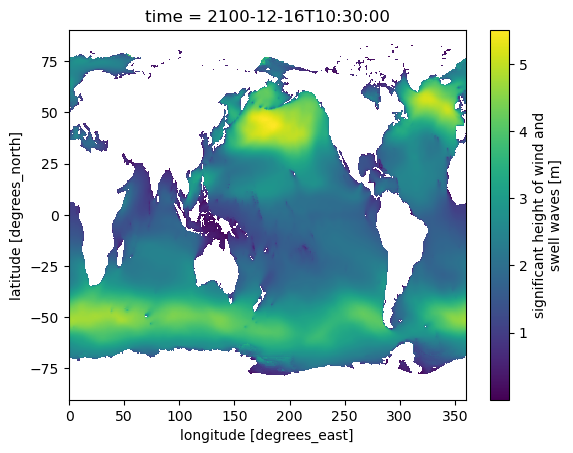

In [4]:
swh.plot()
plt.show()

In [5]:
ds=xr.open_dataset(r"C:\Users\rowe\Downloads\ww3.210012_hs.nc")
ds

<xarray.Dataset>
Dimensions:    (longitude: 720, latitude: 361, time: 248)
Coordinates:
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * latitude   (latitude) float32 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * time       (time) datetime64[ns] 2100-12-01 ... 2100-12-31T21:00:00
Data variables:
    MAPSTA     (latitude, longitude) int16 ...
    hs         (time, latitude, longitude) float32 ...
Attributes: (12/15)
    WAVEWATCH_III_version_number:  6.07
    WAVEWATCH_III_switches:        F90 NOGRB NC4 SCRIP SHRD PR3 UQ FLX4 LN1 S...
    product_name:                  ww3.210012_hs.nc
    area:                          Global regular grid output
    latitude_resolution:           0.
    longitude_resolution:          0.
    ...                            ...
    easternmost_longitude:         360.
    minimum_altitude:              -12000 m
    maximum_altitude:              9000 m
    altitude_resolution:           n/a
    start_date:                    2100-12-01 00:00:00
    stop_date:                     2100-12-31 21:00:00

In [6]:
swh=ds['hs']
swh

<xarray.DataArray 'hs' (time: 248, latitude: 361, longitude: 720)>
[64460160 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * latitude   (latitude) float32 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * time       (time) datetime64[ns] 2100-12-01 ... 2100-12-31T21:00:00
Attributes:
    long_name:      significant height of wind and swell waves
    standard_name:  sea_surface_wave_significant_height
    globwave_name:  significant_wave_height
    units:          m
    valid_min:      0
    valid_max:      32000

In [7]:
ds=xr.open_dataset(r"C:\Users\rowe\Downloads\ww3.210012_hs.nc")
ds

<xarray.Dataset>
Dimensions:    (longitude: 720, latitude: 361, time: 248)
Coordinates:
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * latitude   (latitude) float32 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * time       (time) datetime64[ns] 2100-12-01 ... 2100-12-31T21:00:00
Data variables:
    MAPSTA     (latitude, longitude) int16 ...
    hs         (time, latitude, longitude) float32 ...
Attributes: (12/15)
    WAVEWATCH_III_version_number:  6.07
    WAVEWATCH_III_switches:        F90 NOGRB NC4 SCRIP SHRD PR3 UQ FLX4 LN1 S...
    product_name:                  ww3.210012_hs.nc
    area:                          Global regular grid output
    latitude_resolution:           0.
    longitude_resolution:          0.
    ...                            ...
    easternmost_longitude:         360.
    minimum_altitude:              -12000 m
    maximum_altitude:              9000 m
    altitude_resolution:           n/a
    start_date:                    2100-12-01 00:00:00
    stop_date:                     2100-12-31 21:00:00

In [10]:
swh=ds['hs']
swh.isel(time=1)

<xarray.DataArray 'hs' (latitude: 361, longitude: 720)>
[259920 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * latitude   (latitude) float32 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
    time       datetime64[ns] 2100-12-01T03:00:00
Attributes:
    long_name:      significant height of wind and swell waves
    standard_name:  sea_surface_wave_significant_height
    globwave_name:  significant_wave_height
    units:          m
    valid_min:      0
    valid_max:      32000

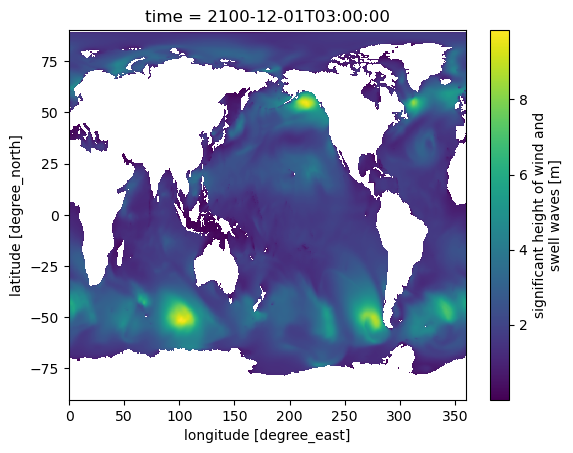

In [12]:
swh.isel(time=1).plot()
plt.show()

In [13]:
ds=xr.open_dataset(r"C:\Users\rowe\Downloads\HsEx_glob_DELFT-IHE_EC-EARTH_rcp85_e1_ann_2081-2099.nc",decode_times=False)
ds

<xarray.Dataset>
Dimensions:    (time: 19, lat: 181, lon: 360)
Coordinates:
  * time       (time) float32 0.0 1.0 2.0 3.0 4.0 ... 14.0 15.0 16.0 17.0 18.0
Dimensions without coordinates: lat, lon
Data variables:
    latitude   (lat) float32 ...
    longitude  (lon) float32 ...
    HsRo       (time, lat, lon) float32 ...
    HsHi       (time, lat, lon) float32 ...
    fHsRo      (time, lat, lon) float32 ...
    fHsHi      (time, lat, lon) float32 ...
    fHs10p     (time, lat, lon) float32 ...
    fHs90p     (time, lat, lon) float32 ...
    HHsDI      (time, lat, lon) float32 ...
Attributes: (12/44)
    title:                                        COWCLIP extremes data from ...
    description:                                  Extremes statistics from Co...
    contact:                                      info@cowclip.org
    product:                                      COWCLIP global
    project:                                      COWCLIP Phase 2, ETCCDI
    modelling_centre:                             DELFT-IHE
    ...                                           ...
    source:                                       COWCLIP contributing datase...
    license:                                      Creative Commons Attributio...
    date_created:                                 2021-08-04T11:41:48.258272
    conventions:                                  CF-1.6
    history:                                      Aug 2021: COWCLIP_stats_mat...
    baseline_period_for_extremes:                 1986-2005

In [25]:
ds=ds.set_coords(["latitude","longitude"])

In [26]:
ds['fHs90p']

<xarray.DataArray 'fHs90p' (time: 19, lat: 181, lon: 360)>
[1238040 values with dtype=float32]
Coordinates:
  * time       (time) float32 0.0 1.0 2.0 3.0 4.0 ... 14.0 15.0 16.0 17.0 18.0
    latitude   (lat) float32 ...
    longitude  (lon) float32 ...
Dimensions without coordinates: lat, lon
Attributes:
    units:      %
    long_name:  Significant wave height annual percentage of days when daily ...

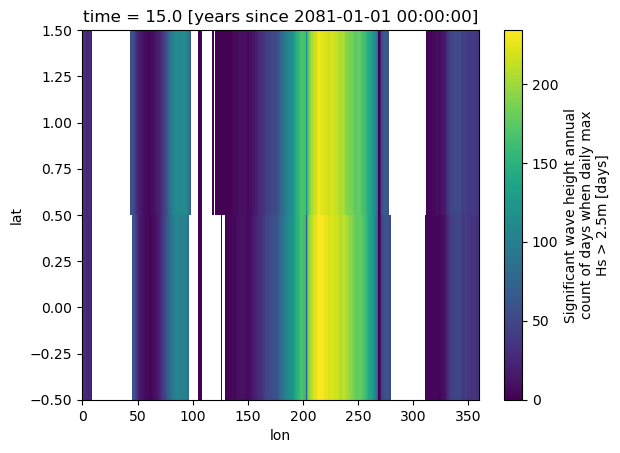

In [36]:
ds['HsRo'].isel(time=15).sel(lat=slice(-90,90)).plot()
plt.show()

In [37]:
ds=xr.open_dataset(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\All_Datasets\Orig_Datasets\01_Hazards\01_Present\Extreme_Wave_Height\era5_coastal_Hs_all_years_CF.nc")
ds

<xarray.Dataset>
Dimensions:    (points: 9662, time: 87696)
Coordinates:
    longitude  (points) float32 ...
    latitude   (points) float32 ...
  * time       (time) datetime64[ns] 2008-01-01 ... 2018-01-01T23:00:00
  * points     (points) int64 0 1 2 3 4 5 6 ... 9656 9657 9658 9659 9660 9661
Data variables:
    swh        (time, points) float32 ...
Attributes: (12/22)
    Conventions:         CF-1.8
    history:             2019-11-02 18:48:31 GMT by grib_to_netcdf-2.14.0: /o...
    TITLE:               ERA5 Wave Data
    TITLE_ABBREVIATION:  era5wd
    DESCRIPTION:         Wave data from the ECMWF Reanalysis v5 (ERA5) with 1...
    SHORT_DESCRIPTION:   Wave data from the ECMWF Reanalysis v5 (ERA5)
    ...                  ...
    CITATION:            ECMWF. (n.d.). ERA5 Reanalysis. Retrieved February 2...
    DOI:                 https://doi.org/10.23615/e5b46c44-8a4f-4a56-b9b6-7a4...
    LONG_NAME:           ERA5_WAVE_DATA
    UNITS:               Metric
    COMMENT:             ERA5 provides hourly estimates of a large number of ...
    CRS:                 EPSG:4326

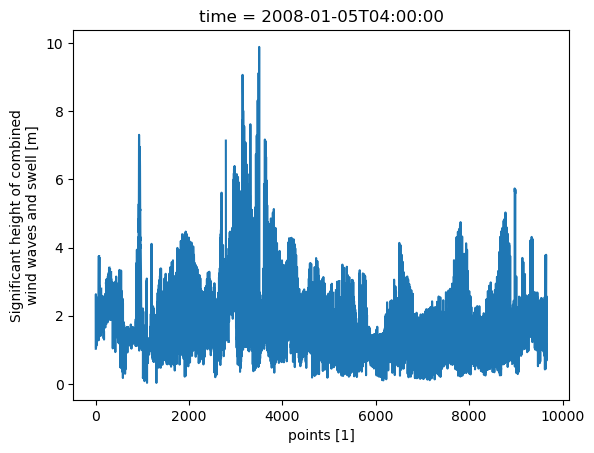

In [40]:
ds['swh'].isel(time=100).loc["point"].plot()
plt.show()

In [ ]:
a=ds.isel(points=1,time=1:2)["latitude"]

SyntaxError: invalid syntax (1366089371.py, line 1)

In [ ]:
p=a.to_dataframe()
p

ValueError: cannot convert a scalar to a DataFrame